In [9]:
#Import Librariess and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/t20.csv')
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [10]:
#Checking missing values
df.isna().sum()

,0
Unnamed: 0,0
match_id,0
batting_team,0
bowling_team,0
ball,0
runs,0
player_dismissed,0
city,8548
venue,0


In [11]:
#Splitting Venue and filling the city missing values
df['city']=df['city'].fillna(df['venue'].apply(lambda x: x.split(" ") [0]))
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [12]:
df['city'].value_counts()

,count
city,
Colombo,4086
Mirpur,3420
Johannesburg,3331
Dubai,2969
Auckland,2532
...,...
Nairobi,123
Potchefstroom,122
Dharamsala,122


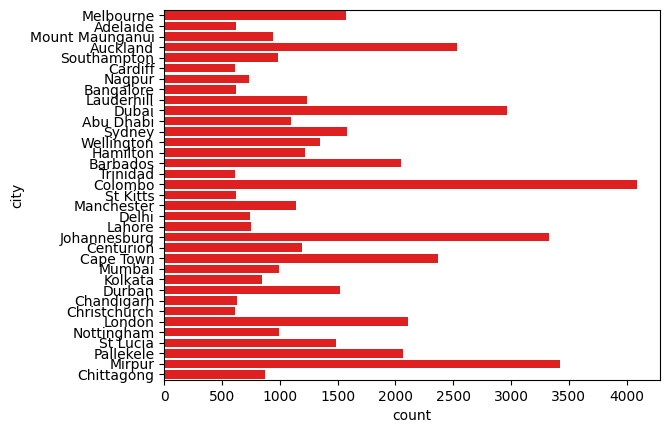

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create count plot
sns.countplot(y='city', data=df, color='r')

# Set y-axis labels with proper rotation and font size
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.show()


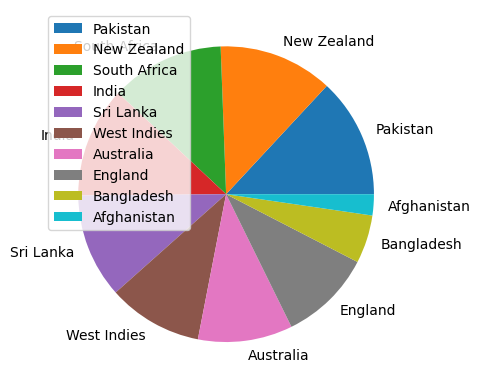

In [14]:
#Matches played by particular teams in T20s
teams = df['batting_team'].value_counts()
lab = teams.index
plt.pie(teams,labels=lab)
plt.legend()
plt.show()


In [15]:
df.shape

(63888, 9)

In [16]:
#Filter cities based on the count of cities they appear in the dataset
eligible_cities=df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad']

In [17]:
df=df[df['city'].isin(eligible_cities)]
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground


In [18]:
df.shape

(50501, 9)

In [19]:
#converts the values in the runs column to numeric format (integers or floats).
#errors='coerce' means that any values that cannot be converted to numeric (e.g., non-numeric strings) will be replaced with NaN (missing values).
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
df['current_score'] = df.groupby('match_id')['runs'].cumsum()

<ipython-input-19-65d5ec99a356>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
<ipython-input-19-65d5ec99a356>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id')['runs'].cumsum()


In [20]:
#Splitting ball into over and ballno
df['over']=df['ball'].apply(lambda x : str(x).split(".")[0])
df['ball_no']=df['ball'].apply(lambda x : str(x).split(".")[1])

<ipython-input-20-2a45f33f35bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over']=df['ball'].apply(lambda x : str(x).split(".")[0])
<ipython-input-20-2a45f33f35bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no']=df['ball'].apply(lambda x : str(x).split(".")[1])


In [21]:
#Calculate no of ball bowled
df['ball_bowled']=(df['over'].astype(int)*6 + df['ball_no'].astype(int))

<ipython-input-21-68ae917e190c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_bowled']=(df['over'].astype(int)*6 + df['ball_no'].astype(int))


In [22]:
#Calculate number of balls bowled
df['balls_left']= 120 - df['ball_bowled']
df.tail()

<ipython-input-22-b7c88df67219>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left']= 120 - df['ball_bowled']


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121,-1


In [23]:
df['balls_left']=df['balls_left'].apply(lambda x:0 if x<0 else x)
df.tail()

<ipython-input-23-0dc8f9a01589>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left']=df['balls_left'].apply(lambda x:0 if x<0 else x)


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121,0


In [24]:
df['player_dismissed']=df['player_dismissed'].apply(lambda x:1 if x !='0' else '0').astype(int)
df.tail()

<ipython-input-24-d64787993774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed']=df['player_dismissed'].apply(lambda x:1 if x !='0' else '0').astype(int)


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,1,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50501 entries, 0 to 63887
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50501 non-null  int64  
 1   match_id          50501 non-null  int64  
 2   batting_team      50501 non-null  object 
 3   bowling_team      50501 non-null  object 
 4   ball              50501 non-null  float64
 5   runs              50501 non-null  int64  
 6   player_dismissed  50501 non-null  int64  
 7   city              50501 non-null  object 
 8   venue             50501 non-null  object 
 9   current_score     50501 non-null  int64  
 10  over              50501 non-null  object 
 11  ball_no           50501 non-null  object 
 12  ball_bowled       50501 non-null  int64  
 13  balls_left        50501 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 5.8+ MB


In [26]:
df['player_dismissed']=df.groupby('match_id')['player_dismissed'].cumsum()
df.tail()

<ipython-input-26-3900483ad190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed']=df.groupby('match_id')['player_dismissed'].cumsum()


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0
63887,125,964,Sri Lanka,Australia,19.7,1,9,Colombo,R Premadasa Stadium,128,19,7,121,0


In [27]:
df['wicket_left']=10-df['player_dismissed']

<ipython-input-27-2595744fdc97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wicket_left']=10-df['player_dismissed']


In [28]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1
63887,125,964,Sri Lanka,Australia,19.7,1,9,Colombo,R Premadasa Stadium,128,19,7,121,0,1


In [29]:
df['current_runrate']=(df['current_score']*6)/df['ball_bowled']

<ipython-input-29-60579d5b65d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_runrate']=(df['current_score']*6)/df['ball_bowled']


In [30]:
#To calculate total runs scored in a each match using match id
final_df=df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [31]:
final_df

,match_id,runs_x,Unnamed: 0,batting_team,bowling_team,ball,runs_y,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left,current_runrate
0,2,168,0,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.000000
1,2,168,1,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.000000
2,2,168,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.000000
3,2,168,3,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.500000
4,2,168,4,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,128,121,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2,6.410256
50497,964,128,122,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2,6.355932
50498,964,128,123,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1,6.302521
50499,964,128,124,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1,6.350000


In [32]:
final_df.columns

Index(['match_id', 'runs_x', 'Unnamed: 0', 'batting_team', 'bowling_team',
       'ball', 'runs_y', 'player_dismissed', 'city', 'venue', 'current_score',
       'over', 'ball_no', 'ball_bowled', 'balls_left', 'wicket_left',
       'current_runrate'],
      dtype='object')

In [33]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wicket_left','current_runrate','runs_x']]
final_df

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,current_runrate,runs_x
0,Australia,Sri Lanka,Melbourne,0,119,10,0.000000,168
1,Australia,Sri Lanka,Melbourne,0,118,10,0.000000,168
2,Australia,Sri Lanka,Melbourne,1,117,10,2.000000,168
3,Australia,Sri Lanka,Melbourne,3,116,10,4.500000,168
4,Australia,Sri Lanka,Melbourne,3,115,10,3.600000,168
...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,Colombo,125,3,2,6.410256,128
50497,Sri Lanka,Australia,Colombo,125,2,2,6.355932,128
50498,Sri Lanka,Australia,Colombo,125,1,1,6.302521,128
50499,Sri Lanka,Australia,Colombo,127,0,1,6.350000,128


In [34]:
final_df.shape

(50501, 8)

In [35]:
final_df.corr(numeric_only=True)

,current_score,balls_left,wicket_left,current_runrate,runs_x
current_score,1.000000,-0.925640,-0.598444,0.423566,0.295986
balls_left,-0.925640,1.000000,0.772946,-0.183096,-0.037947
wicket_left,-0.598444,0.772946,1.000000,0.071554,0.284444
current_runrate,0.423566,-0.183096,0.071554,1.000000,0.490984
runs_x,0.295986,-0.037947,0.284444,0.490984,1.000000


<Axes: >

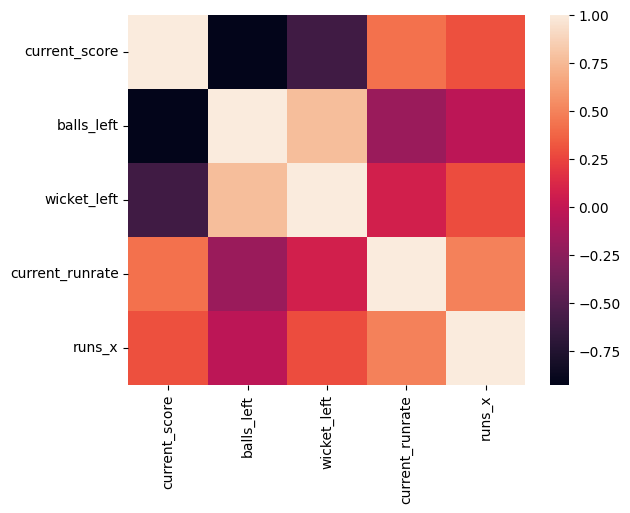

In [36]:
sns.heatmap(final_df.corr(numeric_only=True))

<Axes: ylabel='current_score'>

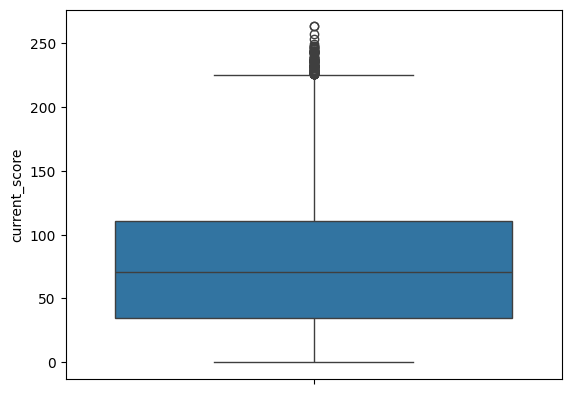

In [37]:
sns.boxplot(final_df['current_score'])

<Axes: ylabel='current_runrate'>

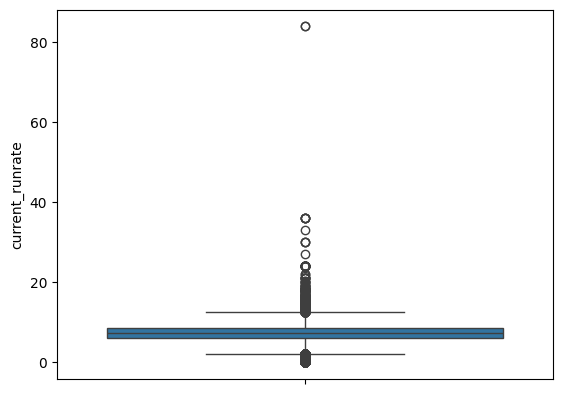

In [38]:
sns.boxplot(final_df['current_runrate'])

<Axes: ylabel='wicket_left'>

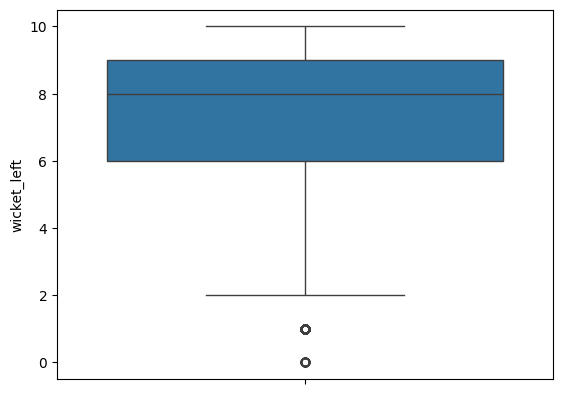

In [39]:
sns.boxplot(final_df['wicket_left'])

<Axes: ylabel='runs_x'>

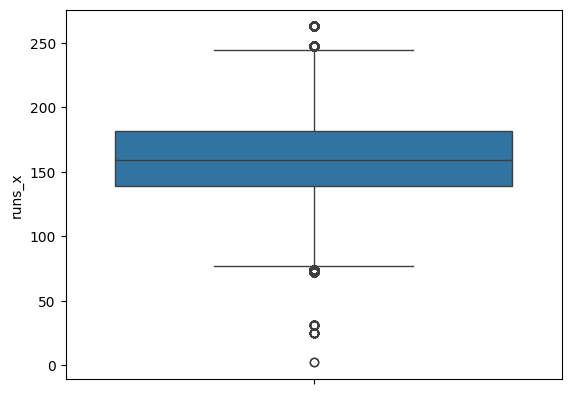

In [40]:
sns.boxplot(final_df['runs_x'])

In [41]:
# def remove_outlier(final_df,col):
#   Q1=final_df[col].quantile(0.25)
#   Q3=final_df[col].quantile(0.75)
#   IQR=Q3-Q1
#   lower= Q1 - 1.5 * IQR
#   upper= Q3 + 1.5 * IQR
#   out = final_df.loc[(df[col]>lower)&(df[col]<upper)]
#   return out

In [42]:
def remove_outlier(final_df, column):

    # Calculate IQR
    Q1 = final_df[column].quantile(0.25)
    Q3 = final_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Determine outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create boolean mask for filtering
    mask = (final_df[column] >= lower_bound) & (final_df[column] <= upper_bound)


    # Check for misalignment issues
    if not mask.index.equals(final_df.index):
         final_df = final_df.reset_index(drop=True)

    # Return filtered DataFrame using the mask
    return final_df[mask]


In [43]:
# Reset the index after dropping NaN values to ensure indices align properly
final_df = final_df.reset_index(drop=True)

# Now apply the remove_outlier function
final_df = remove_outlier(final_df, 'current_score')
final_df = remove_outlier(final_df,'current_runrate')
final_df = remove_outlier(final_df,'runs_x')

<Axes: ylabel='current_runrate'>

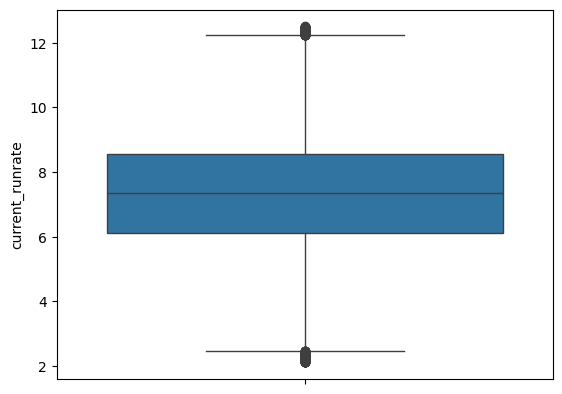

In [44]:
sns.boxplot(final_df['current_runrate'])

<Axes: ylabel='current_score'>

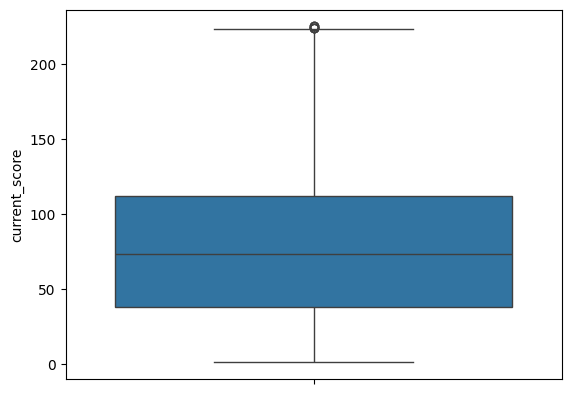

In [45]:
sns.boxplot(final_df['current_score'])

<Axes: ylabel='runs_x'>

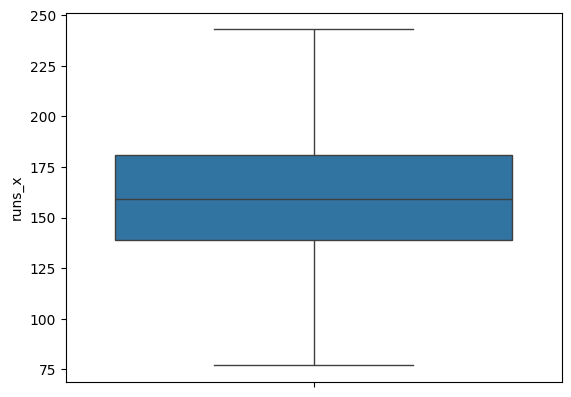

In [46]:
sns.boxplot(final_df['runs_x'])

In [47]:
x=final_df.drop(['runs_x'],axis=1)
x

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,current_runrate
3,Australia,Sri Lanka,Melbourne,3,116,10,4.500000
4,Australia,Sri Lanka,Melbourne,3,115,10,3.600000
5,Australia,Sri Lanka,Melbourne,6,114,10,6.000000
6,Australia,Sri Lanka,Melbourne,6,113,10,5.142857
7,Australia,Sri Lanka,Melbourne,7,112,10,5.250000
...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,Colombo,125,3,2,6.410256
50497,Sri Lanka,Australia,Colombo,125,2,2,6.355932
50498,Sri Lanka,Australia,Colombo,125,1,1,6.302521
50499,Sri Lanka,Australia,Colombo,127,0,1,6.350000


In [48]:
y=final_df['runs_x']
y

,runs_x
3,168
4,168
5,168
6,168
7,168
...,...
50496,128
50497,128
50498,128
50499,128


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error


In [51]:
transformer = ColumnTransformer([
    ('transformer',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [52]:
'''
XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm based on the principles of gradient boosting.
 It is widely used for regression and classification tasks due to its efficiency, accuracy, and ability to handle large datasets.
 Here’s an overview of how the XGBoost regression model works and its key concepts.
Key Concepts of XGBoost

    Gradient Boosting Framework:
        XGBoost builds an ensemble (a collection) of weak learners, typically decision trees, in a sequential manner.
        Each tree in the sequence is built to correct the errors of the previous trees by focusing on data points where the model made
        the largest errors.
        Gradient boosting optimizes the model by minimizing a loss function, such as mean squared error for regression. Each subsequent
        tree adjusts to reduce this loss, ultimately improving the model's accuracy.

    Decision Trees as Base Learners:
        In XGBoost, the individual models are decision trees. Each tree is a weak learner, meaning it makes relatively simple predictions,
         often with low accuracy.
        XGBoost constructs each new tree by taking into account the residuals (errors) from previous trees, making the ensemble of trees
        more accurate over time.

    Regularization:
        XGBoost includes regularization terms (L1 and L2 regularization) in its objective function to penalize the complexity of each tree.
        This helps prevent overfitting and improves model generalization.
        This makes XGBoost particularly effective when compared to other boosting techniques that lack this built-in regularization.

    Handling Missing Values:
        XGBoost can handle missing values within the data by automatically learning the best path for missing data points in the trees,
         without needing separate imputation.

    Parallel and Distributed Computing:
        XGBoost is optimized for parallel processing, meaning it can build trees faster by utilizing all available CPU cores.
        It also supports distributed computing, allowing XGBoost to scale well with large datasets.

    Shrinkage (Learning Rate):
        The learning rate (or shrinkage) controls how much each tree contributes to the final prediction. Smaller values make learning
        slower but can improve model performance by allowing more trees to be built.
        In practice, lower learning rates (e.g., 0.1, 0.2) are often combined with a higher number of trees to reach an optimal balance.

    Early Stopping:
        XGBoost includes an early stopping feature to prevent overfitting. Training stops if the model performance on a validation set
        doesn’t improve after a set number of rounds.

Important Parameters in XGBoost Regression

Here are some key parameters commonly tuned to optimize an XGBoost regression model:

    n_estimators: Specifies the number of boosting rounds (trees). More trees generally increase model complexity and potential accuracy,
     though too many can lead to overfitting.

    max_depth: Determines the maximum depth of each tree. Higher depths allow the model to capture more complex patterns but can also
    increase the risk of overfitting.

    learning_rate: Controls the impact of each tree in the sequence, often between 0 and 1. Lower values require more trees to reach
    optimal performance but may improve generalization.

    subsample: The fraction of samples used to build each tree, typically between 0.5 and 1.0. Using less than 1.0 introduces randomness
    and can reduce overfitting.

    colsample_bytree: The fraction of features used for building each tree, helping to reduce feature dependency and model overfitting.

    gamma: A minimum loss reduction required to split a node. Higher values make the algorithm more conservative, reducing the number of
    splits in trees and potentially limiting overfitting.

How Predictions Are Made in XGBoost Regression

In regression, the goal is to predict a continuous target value. Here’s how XGBoost does it:

    Initial Prediction:
        XGBoost starts with an initial prediction, often the mean of the target variable.

    Building Trees Iteratively:
        In each boosting round, XGBoost creates a tree to minimize the error of the current prediction. Each tree is trained on the
        residuals (errors) from the previous model’s predictions.

    Combining Trees:
        Predictions from each tree are summed to form the final prediction. Trees that improve the model’s accuracy are given higher
        weights, while poorly performing trees are given lower weights.

    Prediction Output:
        For each test data point, XGBoost aggregates the results from all trees in the sequence to produce a final prediction for the
        target variable.

Advantages of XGBoost

    Highly Accurate: Due to its boosting approach and regularization, XGBoost often outperforms other algorithms in prediction tasks.
    Fast and Efficient: XGBoost’s implementation is highly optimized, allowing it to handle large datasets efficiently.
    Flexibility: It allows customization of the loss function and supports several objective functions, making it adaptable to a wide
     range of regression and classification problems.



'''

"\nXGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm based on the principles of gradient boosting.\n It is widely used for regression and classification tasks due to its efficiency, accuracy, and ability to handle large datasets.\n Here’s an overview of how the XGBoost regression model works and its key concepts.\nKey Concepts of XGBoost\n\n    Gradient Boosting Framework:\n        XGBoost builds an ensemble (a collection) of weak learners, typically decision trees, in a sequential manner.\n        Each tree in the sequence is built to correct the errors of the previous trees by focusing on data points where the model made\n        the largest errors.\n        Gradient boosting optimizes the model by minimizing a loss function, such as mean squared error for regression. Each subsequent\n        tree adjusts to reduce this loss, ultimately improving the model's accuracy.\n\n    Decision Trees as Base Learners:\n        In XGBoost, the individual mo

In [53]:
model = Pipeline(steps=[
    ('step1', transformer),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=1))
])

In [54]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [55]:
r2_score(y_test, y_pred)

0.9685335755348206

In [56]:
mean_absolute_error(y_test,y_pred)

2.1577784873140238

In [57]:
import pickle
pickle.dump(model, open('score_prediction.pkl', 'wb'))